In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings
from sklearn import tree
from IPython.display import Image
import pydotplus as pydot 
warnings.filterwarnings("ignore")
from sklearn.externals.six import StringIO
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features.importances import FeatureImportances
from sklearn.ensemble import RandomForestClassifier
from numpy import set_printoptions
from sklearn.ensemble import RandomForestClassifier
set_printoptions(precision=3)
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features.importances import FeatureImportances
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [2]:
Data = pd.read_excel("Gen.xlsx",sheet_name="data").dropna(how = "any")
Data = Data.dropna(how = 'any')

In [3]:
Data['consumption_perDay_within_a_period'] = Data['Consumption HIS']/(Data['NBRE DE JOUR'])
Data.loc[~np.isfinite(Data['consumption_perDay_within_a_period']), 'consumption_perDay_within_a_period'] = 0
Data['Quanitity_consumed_btn_visits'] = Data['QTE FUEL PRECEDENTE'] - Data['QTE FUEL TROUVEE']
set_printoptions(precision=3)
Data['Quanitity_consumed_btn_visits_Per_Day'] = Data['Quanitity_consumed_btn_visits']/(Data['NBRE DE JOUR'])
Data.loc[~np.isfinite(Data['Quanitity_consumed_btn_visits_Per_Day']), 'Quanitity_consumed_btn_visits_Per_Day']= 0
Data['Running time per day'] = Data["NBRE HEURES DE FONCTIONNEMENT DG1"]/Data["NBRE DE JOUR"]             
Data.loc[~np.isfinite(Data['Running time per day']), 'Running time per day'] = 0
set_printoptions(precision=3)
Data['Maximum_consumption_perDay'] = Data[['CONSOMMATION HORAIRE DE FUEL DG1']]*24
set_printoptions(precision=3)

## Data VISUALIZATION 

Generator consumption between he month of September 2017 and March 2018

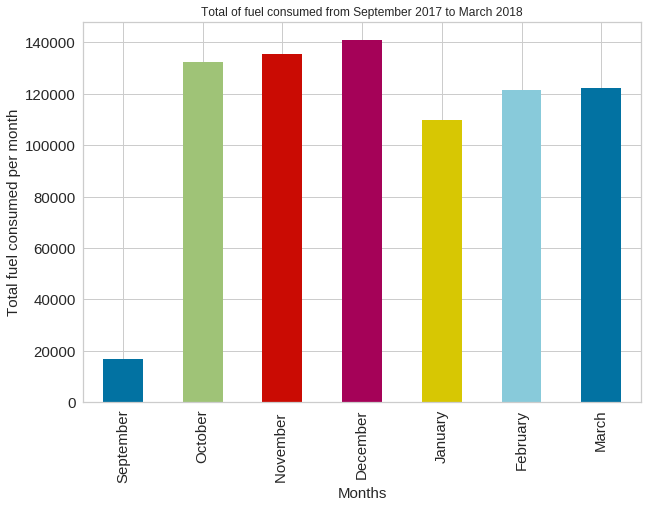

In [4]:
ax = Data.groupby('Months',sort = False)['Consumption HIS'].sum().plot(kind= 'bar', figsize=(10,7),fontsize=15,title = 'Total of fuel consumed from September 2017 to March 2018')
#Sep['Consumption HIS'].sum()
ax.set_ylabel("Total fuel consumed per month", fontsize=15);
plt.xlabel("Months",fontsize=15)
plt.show()

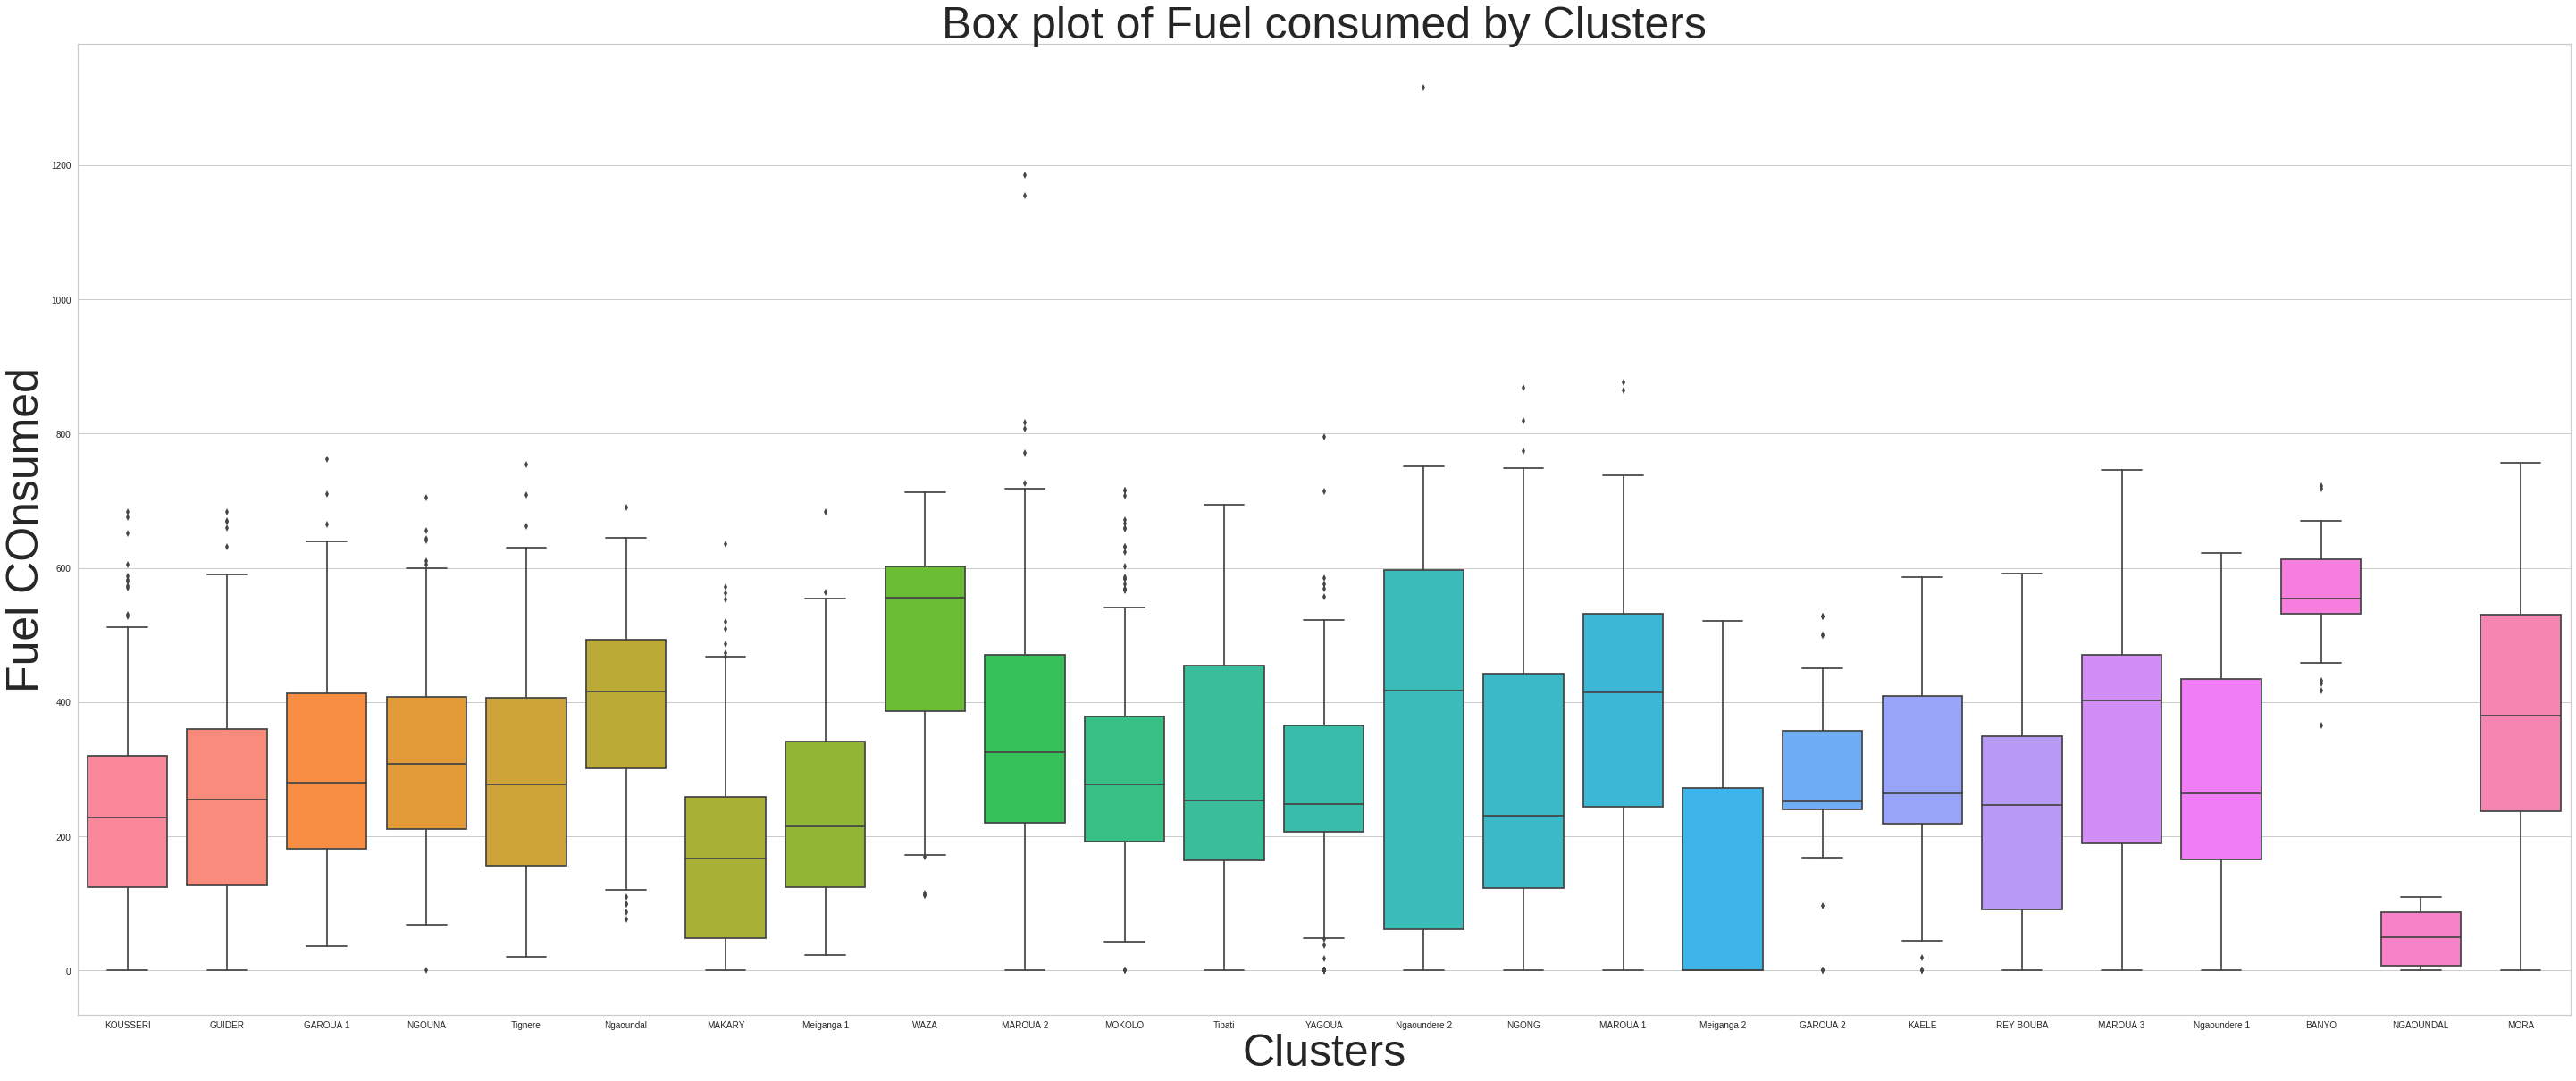

In [5]:
plt.figure(figsize = (50,20))
sns.boxplot(x="Cluster", y= "Consumption HIS",data=Data,saturation=1, width=0.8, fliersize=5, whis=1)
plt.title('Box plot of Fuel consumed by Clusters', fontsize=50)
plt.xlabel( "Clusters",fontsize=50)

plt.ylabel( "Fuel COnsumed",fontsize=50)
plt.show()

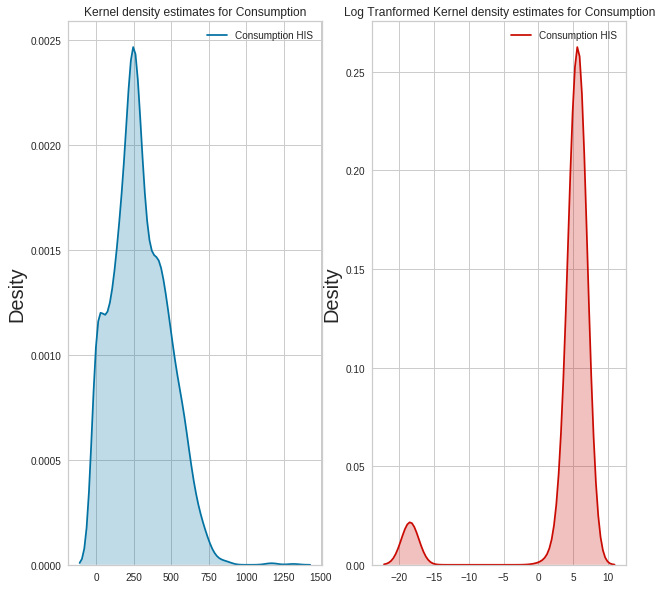

In [6]:
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.ylabel("Desity", fontsize=20)
sns.kdeplot(Data['Consumption HIS'],shade=True)
plt.title('Kernel density estimates for Consumption', fontsize=12)
plt.subplot(1,2,2)
v = 0.00000001
sns.kdeplot(np.log(Data['Consumption HIS']+v),shade=True,color = 'r')
plt.title('Log Tranformed Kernel density estimates for Consumption', fontsize=12)
plt.ylabel("Desity", fontsize=20)
plt.show()

In [7]:
a = list(Data['NBRE HEURES DE FONCTIONNEMENT DG1'])
b = list(Data['Quanitity_consumed_btn_visits'])
c = []
for i in range(len(a)):
    if a[i] == 0  and  b[i]!=0:
        c.append(0)
    else:
        c.append(1)
        
k = list(Data['Running time per day'])
v = []
for i in range(len(k)):
    if k[i] > 24:
        v.append(0)
    else:
        v.append(1)
        
t = list(Data['Maximum_consumption_perDay'])
r = list (Data['consumption_perDay_within_a_period'])
z = []
for i in range(len(r)):
    if r[i] > t[i]:
        z.append(0)
    else:
        z.append(1)
        
        
p = []
for i in range(len(z)):
    if c[i]==1 and z[i]==1 and v[i]==1:
        p.append(1)
    else:
        p.append(0)    
Data['Class'] = p
Data['Class'].unique()

array([1, 0])

In [8]:
data = Data[[ 'CONSOMMATION HORAIRE DE FUEL DG1','consumption_perDay_within_a_period',
       'Quanitity_consumed_btn_visits_Per_Day', 'Running time per day',
       'Class']]

## Principle Component Analaysis for data visualization

In [9]:

x = data.loc[:,data.columns.tolist()[0:4]]
x = x.as_matrix()

# Standardizing the features
X = StandardScaler().fit_transform(x)
Y = data.loc[:,'Class']


In [10]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
PCAData = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
finalDf = pd.concat([PCAData, data[['Class']]], axis = 1)


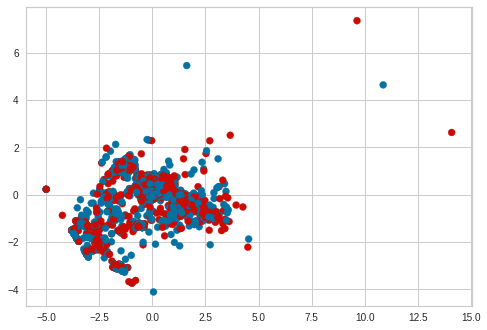

In [11]:
colors = ['r', 'b']
plt.scatter(finalDf ['PC1'],finalDf ['PC2'],c= colors)
plt.show()

## Descriptive Statistic

In [12]:
Data[['NBRE DE JOUR','QTE FUEL PRECEDENTE', "QTE FUEL TROUVEE", 'QTE FUEL TROUVEE','QTE FUEL AJOUTEE','QTE TOTALE LAISSEE' ,'Consumption HIS','NBRE HEURES DE FONCTIONNEMENT DG1' ,'CONSOMMATION HORAIRE DE FUEL DG1' ,'consumption_perDay_within_a_period','Quanitity_consumed_btn_visits','Quanitity_consumed_btn_visits_Per_Day' ,'Running time per day' ,'Maximum_consumption_perDay']].describe()

,NBRE DE JOUR,QTE FUEL PRECEDENTE,QTE FUEL TROUVEE,QTE FUEL TROUVEE,QTE FUEL AJOUTEE,QTE TOTALE LAISSEE,Consumption HIS,NBRE HEURES DE FONCTIONNEMENT DG1,CONSOMMATION HORAIRE DE FUEL DG1,consumption_perDay_within_a_period,Quanitity_consumed_btn_visits,Quanitity_consumed_btn_visits_Per_Day,Running time per day,Maximum_consumption_perDay
count,2676.000000,2676.000000,2676.000000,2676.000000,2676.000000,2676.000000,2676.000000,2676.000000,2676.000000,2676.000000,2676.000000,2676.000000,2676.000000,2676.000000
mean,7.994395,596.426054,278.530703,278.530703,320.998505,599.985112,291.114241,163.436472,1.856297,39.205692,317.895351,42.785483,21.021979,44.551121
std,4.028354,312.877527,261.877123,261.877123,211.943452,314.194494,181.576590,96.535578,0.581018,19.301517,168.816946,18.188008,7.689394,13.944423
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,410.000000,115.000000,115.000000,200.000000,415.000000,163.275000,91.000000,1.570000,24.121528,202.000000,32.000000,22.191667,37.680000
50%,8.000000,553.000000,215.000000,215.000000,300.000000,555.000000,266.550000,169.000000,1.900000,41.042857,304.000000,42.000000,23.818182,45.600000
75%,10.000000,715.000000,366.000000,366.000000,500.000000,720.000000,416.200000,239.000000,2.400000,54.972955,427.000000,54.212500,24.142857,57.600000
max,49.000000,2530.000000,2222.000000,2222.000000,1200.000000,2530.000000,1315.600000,816.000000,3.500000,184.800000,1395.000000,280.000000,96.000000,84.000000


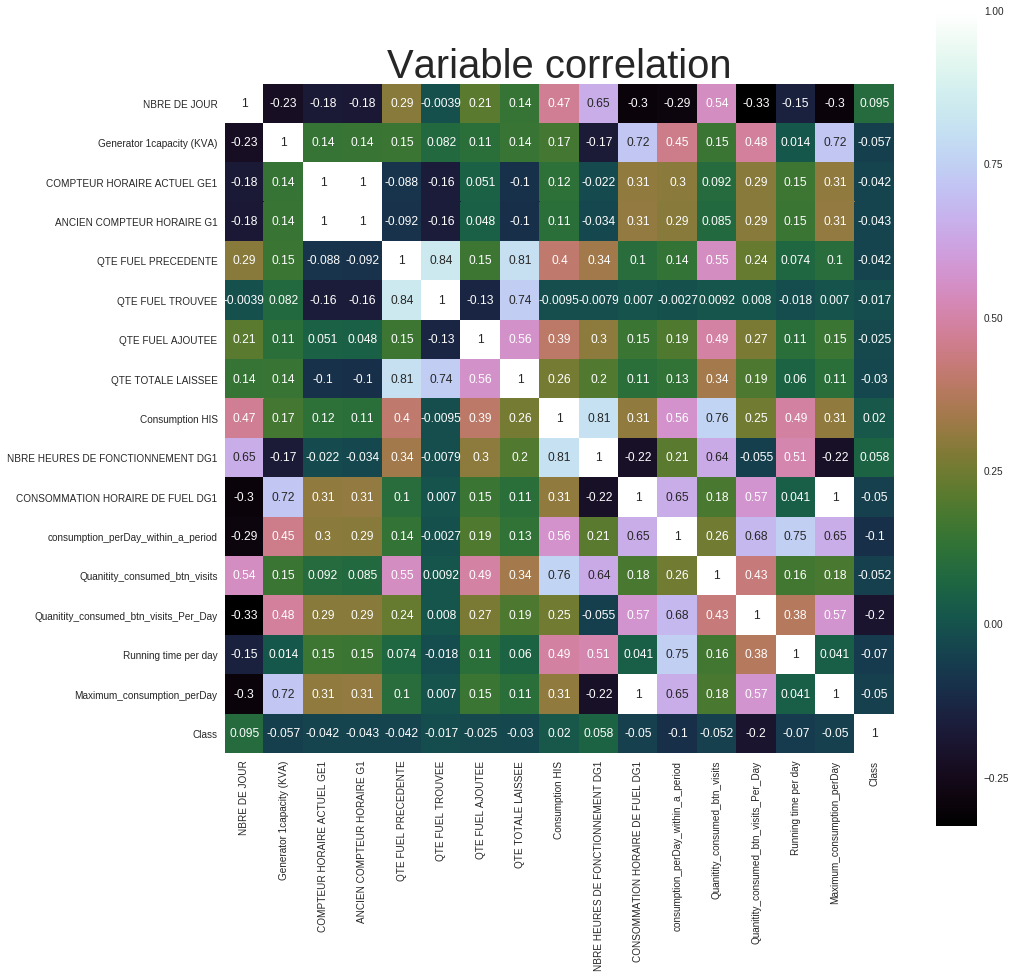

In [13]:
# Correlation heatmap
correlation = Data.corr()  
plt.figure(figsize=(15, 15))  
plt.title("Variable correlation", fontsize= 40)
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')  
plt.show()

## Anormalies Detection 

## Class balance 

Fraud cases:981
Valid cases:1695


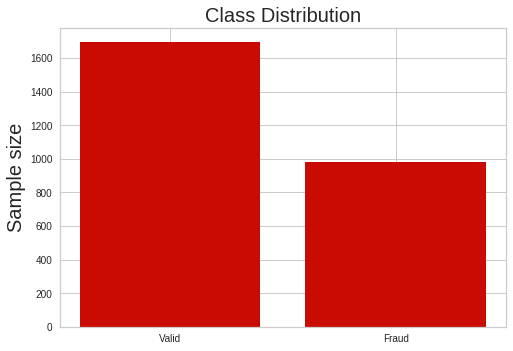

In [14]:
Fraud = Data[Data['Class'] == 0]
Valid =  Data[Data['Class'] == 1]
print('Fraud cases:{}'.format(len(Fraud)))
print('Valid cases:{}'.format(len(Valid)))
classes = ('Valid', 'Fraud')
y_pos = np.arange(len(classes))
p = [1695, 981]
 
plt.bar(y_pos,p, color = 'r')
plt.xticks(y_pos, classes)
plt.ylabel('Sample size',fontsize = 20)
plt.xlabel('',fontsize = 20)
plt.title('Class Distribution', fontsize = 20)
 
plt.show()

## One Case of Anomalies in the data


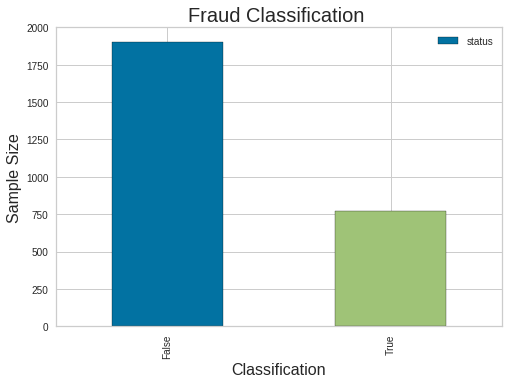

In [15]:
Data['status'] = Data['Running time per day']> 24
Data['status'].value_counts().plot(kind='bar',edgecolor='black')
plt.xlabel('Classification', fontsize=16)
plt.ylabel('Sample Size', fontsize=16)
plt.title('Fraud Classification ',fontsize=20)
plt.legend(loc='upper right' )
plt.show()

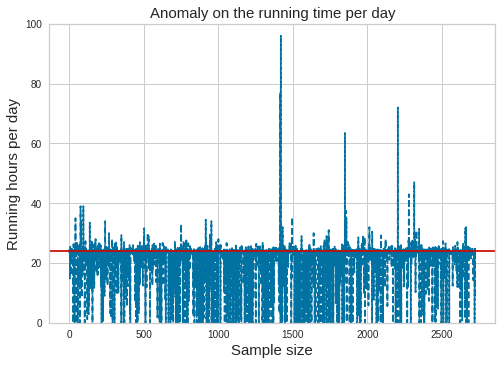

In [90]:
plt.plot( Data['Running time per day'], linestyle = '--')
plt.axhline(24, color='r')
plt.title('Anomaly on the running time per day', fontsize = 15)
plt.xlabel('Sample size', fontsize = 15)
plt.ylabel('Running hours per day', fontsize = 15)
plt.ylim(0,100,5)
plt.show()

# Feature Importances

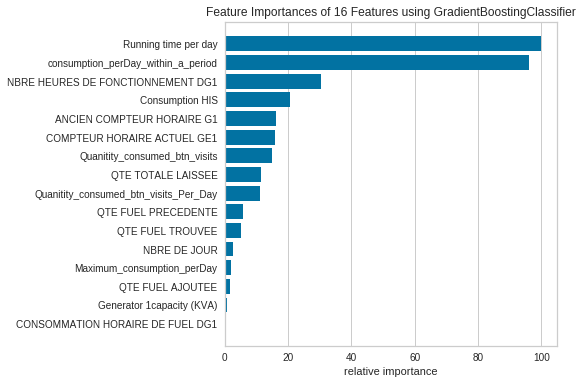

In [16]:
y = Data.pop("Class")
Data.pop("status")
s = Data._get_numeric_data()
# Create a new matplotlib figure
fig = plt.figure()
ax = fig.add_subplot()
viz = FeatureImportances(GradientBoostingClassifier(), ax=ax)
viz.fit(s, y)
viz.poof()


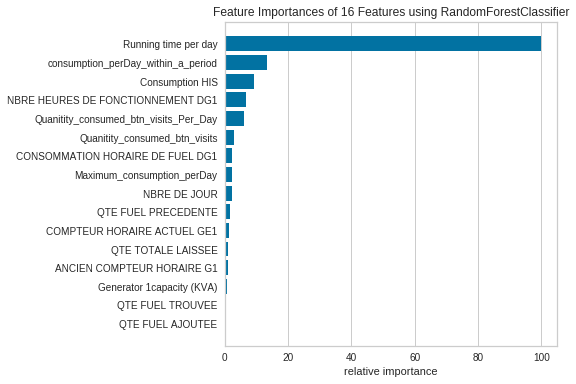

In [17]:


x_train, x_test, y_train, y_test = train_test_split(s, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(random_state=43)      
rf = rf.fit(x_train,y_train)
# Create a new matplotlib figure
ax = fig.add_subplot()
viz = FeatureImportances( RandomForestClassifier(random_state=43) , ax=ax)
viz.fit(s, y)
viz.poof()

In [18]:
# FUNCTION TO MAKE PREDICTIONS

def predictmodel(model):
    y_pred = model.predict(x_test)
    f,t,thresholds = metrics.roc_curve(y_test,y_pred)
    cm = metrics.confusion_matrix(y_test,y_pred)
    
    print("Score:", metrics.auc(f,t))
    print("Classification report:")
    print(metrics.classification_report(y_test,y_pred))
    print("Confusion Matrix:")
    print(cm)

# # Support Vector Classifier

## SVC with C= 1000 and gamma = 0.001 with nonlinear kernel function 'rbf'

Score: 0.9394934333958724
Classification report:
             precision    recall  f1-score   support

          0       0.97      0.89      0.93       208
          1       0.94      0.98      0.96       328

avg / total       0.95      0.95      0.95       536

Confusion Matrix:
[[186  22]
 [  5 323]]


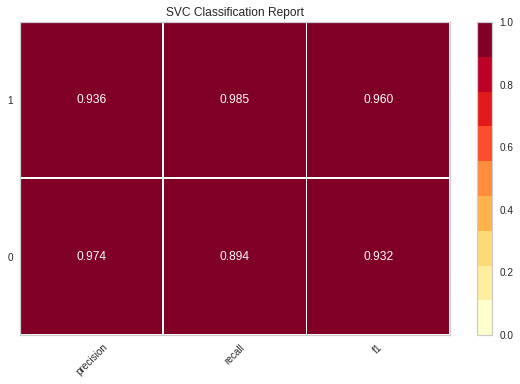

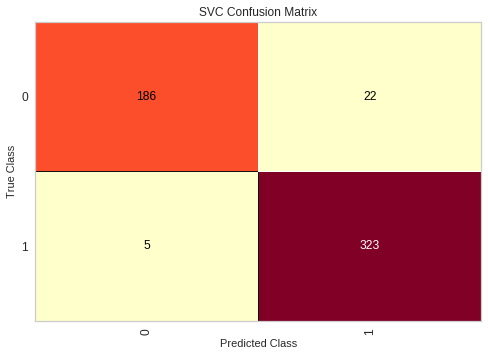

In [19]:
x = data.loc[:,data.columns.tolist()[0:4]]
x = x.as_matrix()
Y = data.loc[:,'Class']
Y = Y.as_matrix()
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size=0.20,random_state=2700) 
SVM =SVC(kernel="rbf", C=1000, gamma = 0.001, decision_function_shape=None, probability=True)
SVM.fit(x_train , y_train)
predictmodel(SVM)

visualizer = ClassificationReport(SVM)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.poof()
cm = ConfusionMatrix(SVM, classes=[0,1])
cm.fit(x_train, y_train)
cm.score(x_test, y_test)
cm.poof()

## SVC with nonlimear kernel and C = 0.001 and gamaa = 1

In [20]:
SVM =SVC(kernel="rbf", C=100, gamma =1, decision_function_shape='ovr')
SVM.fit(x_train , y_train)
predictmodel(SVM)

Score: 0.8702509380863039
Classification report:
             precision    recall  f1-score   support

          0       0.94      0.77      0.85       208
          1       0.87      0.97      0.92       328

avg / total       0.90      0.89      0.89       536

Confusion Matrix:
[[161  47]
 [ 11 317]]


## SVC with a linear kernet and c =1000 and gamaa 0.001

SVM =SVC(kernel="linear", C=1000, gamma =0.001, decision_function_shape='ovr')
SVM.fit(x_train , y_train)
predictmodel(SVM)


from sklearn.grid_search import GridSearchCV
 
svc = SVC()
 
param_grid = { 
           "kernel" : ['linear', 'poly', 'rbf', 'sigmoid'],
           "gamma" : [1e-1, 1e-2, 1e-3, 1e-4],
           "C" : [1, 10, 100, 1000]}
 
CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv= 10)
CV_svc.fit(x_train, y_train)
print(CV_svc.best_params_)

## Plot of accuracy against parameter C and against std

[0.667910447761194, 0.8638059701492538, 0.9123134328358209, 0.9216417910447762, 0.9253731343283582, 0.9235074626865671, 0.9235074626865671, 0.9235074626865671, 0.9216417910447762, 0.9216417910447762, 0.9216417910447762, 0.9216417910447762, 0.9216417910447762]
[0.0005885200009875566, 0.005717964745782411, 0.03303977702795174, 0.026723458114869512, 0.02430917110194531, 0.02430917110194531, 0.02430917110194531, 0.02430917110194531, 0.02430917110194531, 0.02430917110194531, 0.02430917110194531, 0.02430917110194531, 0.02430917110194531]


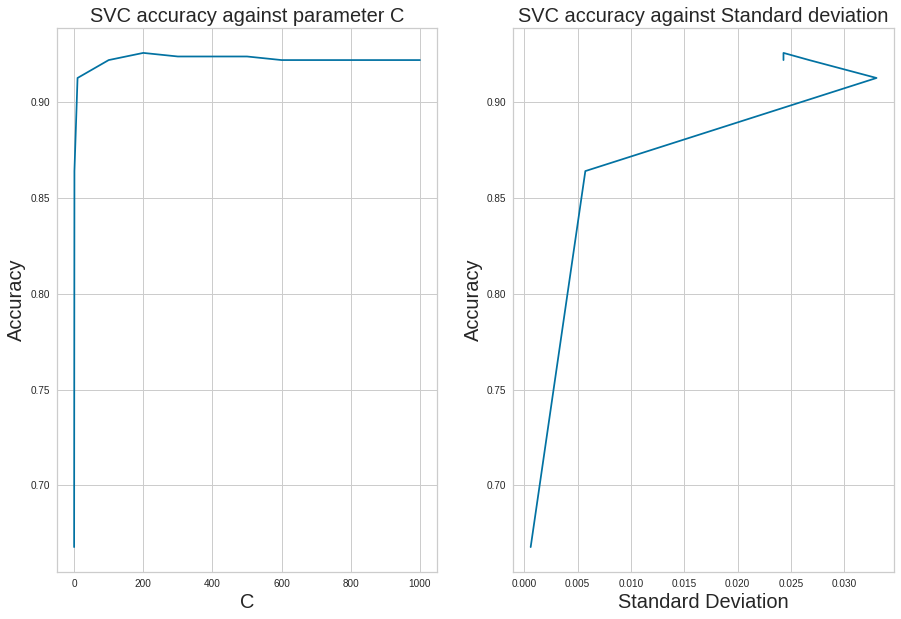

In [21]:
P = [0.1,1,10, 100,200,300,400,500,600,700,800,900,1000]
L = []
jj = []
for i in range(len(P)):
    scv = SVC(C=P[i])   
    scv.fit(x_train, y_train)
    L.append(scv.score(x_test, y_test))
    jj.append(cross_val_score(scv, x_test, y_test).std())
print(L)
print(jj)
plt.figure(figsize = (15,10))
plt.subplot(1,2,1)

plt.plot(P,L)
plt.xlabel("C",  fontsize = 20)
plt.title("SVC accuracy against parameter C",  fontsize = 20)
plt.ylabel("Accuracy", fontsize = 20)

plt.subplot(1,2,2)
plt.plot(jj,L)
plt.xlabel("Standard Deviation", fontsize = 20)
plt.title("SVC accuracy against Standard deviation",  fontsize = 20)
plt.ylabel("Accuracy",  fontsize = 20)
plt.show()

[0.6119402985074627, 0.6902985074626866, 0.7611940298507462, 0.8190298507462687, 0.871268656716418, 0.8656716417910447]


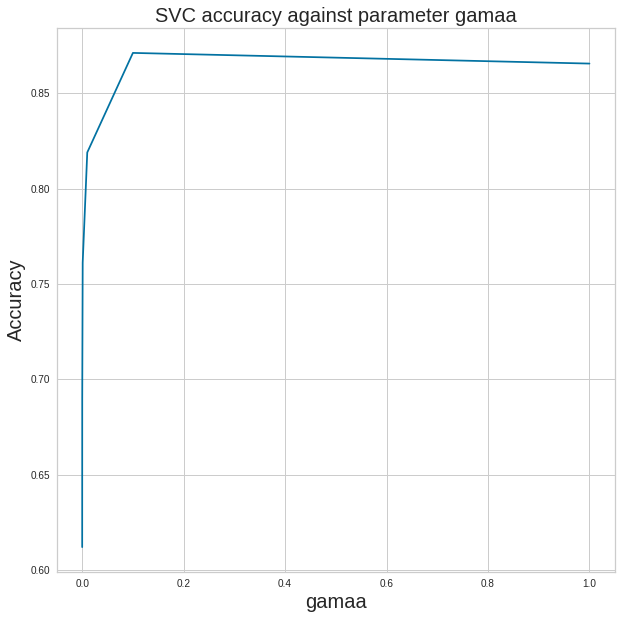

In [22]:
G= [0.00001,0.0001,0.001,0.01,0.1,1]
LL= []

for i in range(len(G)):
    scv = SVC(gamma = G[i])   
    scv.fit(x_train, y_train)
    LL.append(scv.score(x_test, y_test))
print(LL)

plt.figure(figsize = (10,10))
plt.plot(G,LL)
plt.xlabel("gamaa",  fontsize = 20)
plt.title("SVC accuracy against parameter gamaa",  fontsize = 20)
plt.ylabel("Accuracy", fontsize = 20)
plt.show()

In [23]:

SVM =SVC(kernel="rbf", C=1000, gamma = 0.001, decision_function_shape=None, probability=True)
SVM.fit(x_train , y_train)
y_pred_prob = SVM.predict_proba(x_test)[:, 0]
y_pred_probs = SVM.predict_proba(x_test)[:, 1]
y_pred_probC = SVM.predict_proba(x_test)
y_pred= SVM.predict(x_test)
print(y_pred_prob[0:5])
print(y_pred_probs[0:5])
print(y_pred_probC )

[3.000e-14 2.437e-01 3.000e-14 3.383e-08 3.051e-03]
[1.    0.756 1.    1.    0.997]
[[3.000e-14 1.000e+00]
 [2.437e-01 7.563e-01]
 [3.000e-14 1.000e+00]
 ...
 [9.983e-01 1.676e-03]
 [3.000e-14 1.000e+00]
 [9.898e-01 1.024e-02]]


## ROC Curve

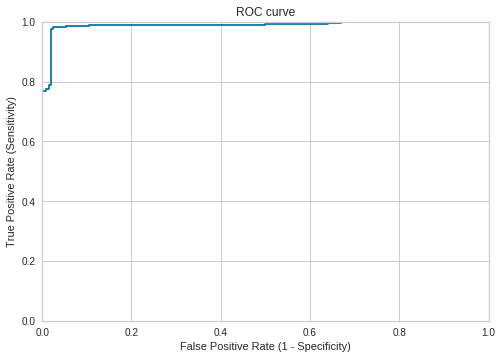

In [24]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve' )
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

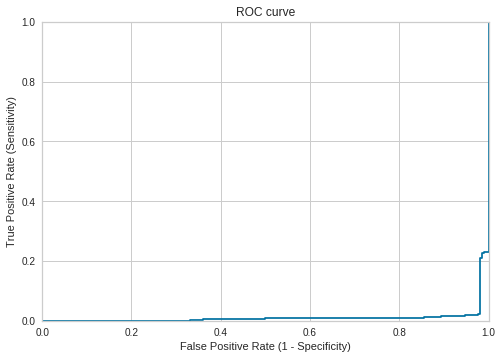

In [25]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 15
plt.title('ROC curve' )
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

In [26]:
metrics.roc_auc_score(y_test, y_pred_probs)

0.989563789868668

In [27]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds =precision_recall_curve(y_test, y_pred)
print(precision)
print(recall)
print(thresholds)

[0.612 0.936 1.   ]
[1.    0.985 0.   ]
[0 1]


# # Nueral Network- MultiLayer Percetron (MLP)

In [28]:
def predictmodelMLP(model):
    y_pred = model.predict(x_tests)
    f,t,thresholds = metrics.roc_curve(y_tests,y_pred)
    cm = metrics.confusion_matrix(y_tests,y_pred)
    
    print("Score:", metrics.auc(f,t))
    print("Classification report:")
    print(metrics.classification_report(y_tests,y_pred))
    print("Confusion Matrix:")
    print(cm)

Score: 0.913578799249531
Classification report:
             precision    recall  f1-score   support

          0       0.89      0.89      0.89       208
          1       0.93      0.93      0.93       328

avg / total       0.92      0.92      0.92       536

Confusion Matrix:
[[186  22]
 [ 22 306]]
Training set score: 0.954206
Test set score: 0.917910


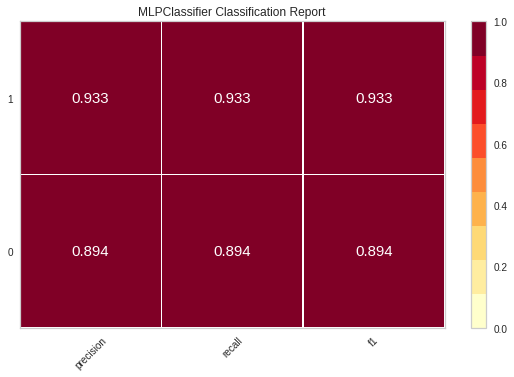

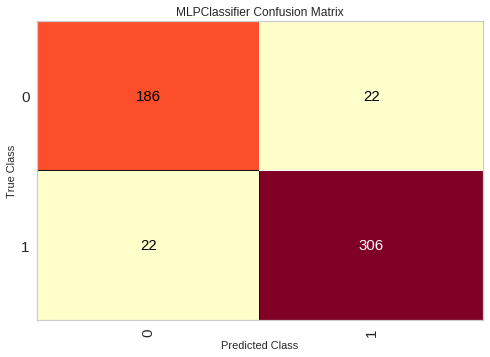

In [29]:
x = data.loc[:,data.columns.tolist()[0:4]]
x = x.as_matrix()
Y = data.loc[:,'Class']
Y = Y.as_matrix()
x_trains,x_tests,y_trains,y_tests = train_test_split(x,Y,test_size=0.2,random_state=2700)
scaler = StandardScaler()
scaler.fit(x_trains)
x_trains = scaler.transform(x_trains)
scaler.fit(x_tests)
x_tests = scaler.transform(x_tests) 

clf = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08, learning_rate='constant', learning_rate_init=0.01, max_iter=1000,random_state=2700, shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1)
clf.fit(x_trains, y_trains)

predictmodelMLP(clf)
print("Training set score: %f" % clf.score(x_trains, y_trains))
print("Test set score: %f" % clf.score(x_tests, y_tests))

visualizer = ClassificationReport(clf)
visualizer.fit(x_trains, y_trains)
visualizer.score(x_tests, y_tests)
visualizer.poof()
cm = ConfusionMatrix(clf, classes=[0,1])
cm.fit(x_trains, y_trains)
cm.score(x_tests, y_tests)
cm.poof()

## Weight of the Hidden layers

In [30]:
#print("weights between input and first hidden layer:")
#print(clf.coefs_[1])
#print("w0 = ", clf.coefs_[0][0][0])
#print("w1 = ", clf.coefs_[0][1][0])
#clf.coefs_[0][:,0]
#for i in range(len(clf.coefs_)):
#    number_neurons_in_layer = clf.coefs_[i].shape[1]
#    for j in range(number_neurons_in_layer):
#        weights = clf.coefs_[i][:,j]
#        print(i, j, weights, end=", ")
 #       print()
#   print()

In [31]:
#print("Bias values for first hidden layer:")
#print(clf.intercepts_[0])
#print("\nBias values for second hidden layer:")
print(clf.intercepts_[1])

[1.44]


## MPL with apha = 1 and a learning_rate_init = 1 

In [32]:
clf = MLPClassifier( activation='relu', alpha=1, batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08, learning_rate='adaptive', learning_rate_init=1, max_iter=1000,random_state=2700, shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1)
clf.fit(x_trains, y_trains)
predictmodel(clf)

Score: 0.510670731707317
Classification report:
             precision    recall  f1-score   support

          0       0.39      1.00      0.56       208
          1       1.00      0.02      0.04       328

avg / total       0.76      0.40      0.24       536

Confusion Matrix:
[[208   0]
 [321   7]]


## MPL with apha = 0.01 and a learning_rate_init =0. 1 ,learning_rate=constant

In [33]:
clf = MLPClassifier( activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08, learning_rate='constant', learning_rate_init=0.1, max_iter=1000,random_state=2700, shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1)
clf.fit(x_trains, y_trains)
predictmodel(clf)

Score: 0.48903611632270166
Classification report:
             precision    recall  f1-score   support

          0       0.38      0.96      0.55       208
          1       0.44      0.02      0.04       328

avg / total       0.42      0.38      0.24       536

Confusion Matrix:
[[199   9]
 [321   7]]


## MPL with apha = 0.0001 and a learning_rate_init = 0.001 ,learning_rate=constant

In [34]:
clf = MLPClassifier( activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08, learning_rate='constant', learning_rate_init=0.001, max_iter=1000,random_state=2700, shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1)
clf.fit(x_trains, y_trains)
predictmodel(clf)

Score: 0.510670731707317
Classification report:
             precision    recall  f1-score   support

          0       0.39      1.00      0.56       208
          1       1.00      0.02      0.04       328

avg / total       0.76      0.40      0.24       536

Confusion Matrix:
[[208   0]
 [321   7]]


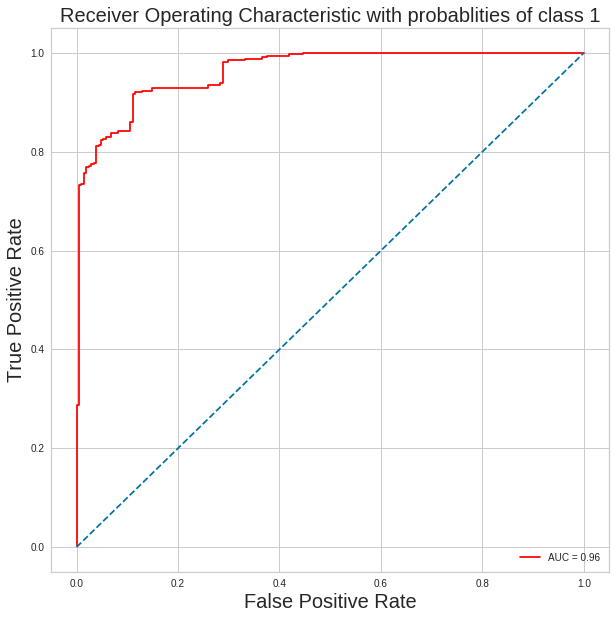

In [35]:
y_prob1 = clf.predict_proba(x_tests)[:,1]
y_prob0 = clf.predict_proba(x_tests)
y_prob2 = clf.predict_proba(x_tests)[:,0]
y_pred = clf.predict(x_tests)
clf.score(x_tests, y_pred)
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_tests, y_prob1)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic with probablities of class 1', fontsize = 20)
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate', fontsize = 20)
plt.xlabel('False Positive Rate',fontsize = 20)
plt.show()

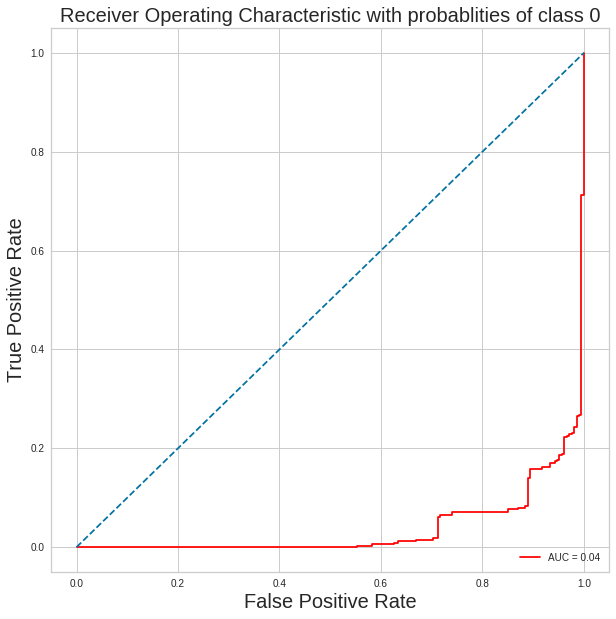

In [36]:
y_prob1 = clf.predict_proba(x_tests)[:,1]
y_prob0 = clf.predict_proba(x_tests)
y_prob2 = clf.predict_proba(x_tests)[:,0]
y_pred = clf.predict(x_tests)
clf.score(x_tests, y_pred)
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_tests, y_prob2)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic with probablities of class 0', fontsize = 20)
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate', fontsize = 20)
plt.xlabel('False Positive Rate',fontsize = 20)
plt.show()

## Logistic regression Classifier

In [37]:
def predictmodelMLP(model):
    y_pred = model.predict(X_testl)
    f,t,thresholds = metrics.roc_curve(Y_testl,y_pred)
    cm = metrics.confusion_matrix(Y_testl,y_pred)
    
    print("Score:", metrics.auc(f,t))
    #print("Classification report:")
    #print(metrics.classification_report,Y_testl,y_pred)
    print("Confusion Matrix:")
    print(cm)

## Class weight included

In [38]:
xl = data.loc[:,data.columns.tolist()[0:4]]
#xl = x.as_matrix()
Yl = data.loc[:,'Class']
#Yl = Y.as_matrix()
scaler = StandardScaler()
scaler.fit(xl)
x_trainl,x_testl,y_trainl,y_testl = train_test_split(xl,Yl,test_size=0.3,random_state=2700)
scaler = StandardScaler()
scaler.fit(x_trainl)
x_trains = scaler.transform(x_trainl)
scaler.fit(x_testl)
x_tests = scaler.transform(x_testl) 
X = scaler.transform(xl)
LR = LogisticRegression(C = 0.001,penalty='l2',class_weight='balanced')
num_folds = 3
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(LR, X, Yl, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 56.278% (1.869%)


In [39]:
xl = data.loc[:,data.columns.tolist()[0:4]]
#xl = x.as_matrix()
Yl = data.loc[:,'Class']
#Yl = Y.as_matrix()
scaler = StandardScaler()
scaler.fit(xl)
x_trainl,x_testl,y_trainl,y_testl = train_test_split(xl,Yl,test_size=0.2,random_state=2700)
scaler = StandardScaler()
scaler.fit(x_trainl)
x_trains = scaler.transform(x_trainl)
scaler.fit(x_testl)
x_tests = scaler.transform(x_testl) 
X = scaler.transform(x)
LRs= LogisticRegression(C = 0.001,penalty='l2')
num_folds = 3
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(LRs, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 64.948% (1.923%)


## Resampling -Oversampling 

In [40]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(xl, Yl)

print(X_ros.shape[0] - xl.shape[0], 'new random picked points')

714 new random picked points


In [41]:
xl = data.loc[:,data.columns.tolist()[0:4]]
#xl = x.as_matrix()
Yl = data.loc[:,'Class']
#Yl = Y.as_matrix()
scaler = StandardScaler()
scaler.fit(xl)
X_trainl,X_testl,Y_trainl,Y_testl = train_test_split(X_ros, y_ros,test_size=0.2,random_state=2700)
scaler = StandardScaler()
scaler.fit(X_trainl)
X_trains = scaler.transform(X_trainl)
scaler.fit(X_testl)
X_tests = scaler.transform(X_testl) 
X_ros = scaler.transform(X_ros)
LR = LogisticRegression(C = 100,penalty='l1' )
LR.fit(X_trainl, Y_trainl)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
from collections import Counter
print(sorted(Counter(y_ros).items()))

[(0, 1695), (1, 1695)]


In [43]:
LR.fit(X_trainl, Y_trainl)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
predictmodelMLP(LR)

Score: 0.597143605870021
Confusion Matrix:
[[204 114]
 [161 199]]


## Resampling Under Sampling 

In [45]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(xl, Yl)
from collections import Counter
print(sorted(Counter(y_rus).items()))

[(0, 981), (1, 981)]


In [46]:
X_trainU,X_testU,Y_trainU,Y_testU = train_test_split(X_rus, y_rus,test_size=0.2,random_state=2700)
scaler = StandardScaler()
scaler.fit(X_trainU)
X_trainU = scaler.transform(X_trainU)
scaler.fit(X_testU)
X_testU = scaler.transform(X_testU) 
LRu = LogisticRegression(C = 100,penalty='l1' )
LRu.fit(X_trainl, Y_trainl)
predictmodelMLP(LRu)

Score: 0.597143605870021
Confusion Matrix:
[[204 114]
 [161 199]]


In [47]:
y_pred = LR.predict(x_testl)
LR.score(x_testl, y_testl)

0.6044776119402985

In [48]:
LR.fit(x_trainl, y_trainl)
y_probl = LR.predict_proba(x_testl)
y_predl = LR.predict(x_testl)
auc_roc=metrics.roc_auc_score(y_testl,y_pred)
auc_roc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_testl, y_predl)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5252110694183865

In [49]:
pd.Series(y_testl).value_counts()

1    328
0    208
Name: Class, dtype: int64

In [50]:
pd.Series(y_testl).mean()

0.6119402985074627

In [51]:
1 - pd.Series(y_testl).mean()

0.3880597014925373

In [52]:
max(y_testl.mean(), 1 - y_testl.mean())

0.6119402985074627

In [53]:
pd.Series(y_testl).value_counts().head(1) / len(pd.Series(y_testl))

1    0.61194
Name: Class, dtype: float64

In [54]:
y_pred_probs = LR.predict_proba(x_tests)[:,0]

In [55]:
y_trainl =  pd.DataFrame(y_trainl)

In [56]:
y_pred_probC1 = LR.predict_proba(x_tests)[:,1]
y_pred_probC0 = LR.predict_proba(x_tests)[:,0]

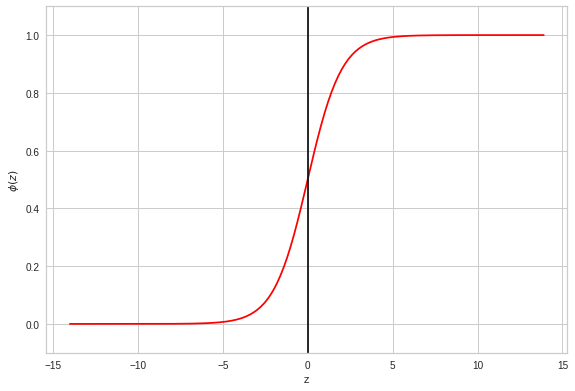

In [57]:

 # Define the sigmoid function
def sigmoid(t):
    return (1/(1 + np.e**(-t)))    
plot_range = np.arange(-14, 14, 0.1)       
y_values = sigmoid(plot_range )
# Plot curve

plt.plot(plot_range,y_values, color="red")
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()

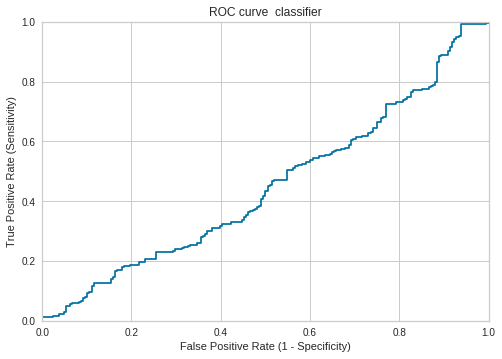

In [58]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_tests, y_pred_probC1)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve  classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

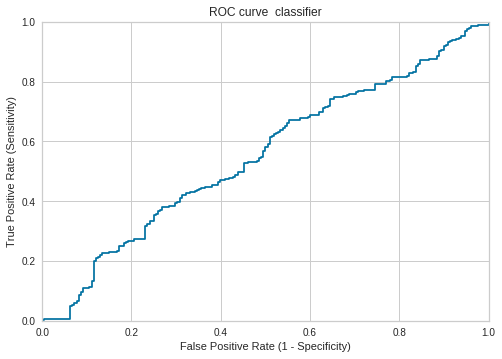

In [59]:
fpr, tpr, thresholds = metrics.roc_curve(y_tests, y_pred_probC0)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve  classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

LR_model= LogisticRegression()

tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
              'penalty':['l1','l2']
                   }

LRm= GridSearchCV(LR_model, tuned_parameters,cv=10)
LRm.fit(X_trainl,Y_trainl)

## k-nearest neighbors 

In [60]:
KNN = KNeighborsClassifier(n_neighbors=1, algorithm='auto',p=2, metric='minkowski')
KNN.fit(x_train , y_train)
predictmodel(KNN)
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(KNN.score(x_test, y_test)))

Score: 0.8972209193245778
Classification report:
             precision    recall  f1-score   support

          0       0.87      0.88      0.87       208
          1       0.92      0.91      0.92       328

avg / total       0.90      0.90      0.90       536

Confusion Matrix:
[[183  25]
 [ 28 300]]
Accuracy of K-NN classifier on test set: 0.90


# Compare Algorithms

 LR : 0.649451 (0.029063)
 KNN : 0.921526 (0.016175)
 SVM : 0.861317 (0.031965)
 MLP : 0.939801 (0.024395)


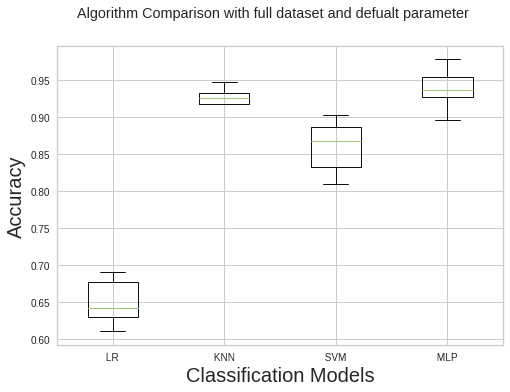

In [61]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression# Compare Algorithms
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
# load dataset


scaler = StandardScaler()
scaler.fit(x)
X= scaler.transform(x)


results = []
names = []
scoring = 'accuracy'
models = []
models.append(( ' LR ' , LogisticRegression()))
models.append(( ' KNN ' , KNeighborsClassifier()))
models.append(( ' SVM ' , SVC()))
models.append(( ' MLP ' ,  MLPClassifier()))
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model,X, Y, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison with full dataset and defualt parameter')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.ylabel("Accuracy", fontsize=20)
plt.xlabel("Classification Models", fontsize=20)
plt.show()

# FULL DATASET Model COMPARISON

In [62]:
DATA= pd.read_excel("FullData.xlsx",sheet_name="All Cluster")
Df = DATA[['QTE FUEL PRECEDENTE','QTE FUEL TROUVEE','QTE FUEL AJOUTEE','QTE TOTALE LAISSEE','Consumption HIS' ,'NBRE HEURES DE FONCTIONNEMENT DG1','CONSOMMATION HORAIRE DE FUEL DG1','NBRE DE JOUR']]

In [63]:
Df['consumption_perDay_within_a_period'] = Df['Consumption HIS']/(Df['NBRE DE JOUR'])
Df.loc[~np.isfinite(Df['consumption_perDay_within_a_period']), 'consumption_perDay_within_a_period'] = 0
Df['Quanitity_consumed_btn_visits'] = Df['QTE FUEL PRECEDENTE'] - Df['QTE FUEL TROUVEE']
set_printoptions(precision=3)
Df['Quanitity_consumed_btn_visits_Per_Day'] = Df['Quanitity_consumed_btn_visits']/(Df['NBRE DE JOUR'])
Df.loc[~np.isfinite(Df['Quanitity_consumed_btn_visits_Per_Day']), 'Quanitity_consumed_btn_visits_Per_Day']= 0
Df['Running time per day'] = Df["NBRE HEURES DE FONCTIONNEMENT DG1"]/Df["NBRE DE JOUR"]             
Df.loc[~np.isfinite(Df['Running time per day']), 'Running time per day'] = 0
set_printoptions(precision=3)
Df['Maximum_consumption_perDay'] = Df[['CONSOMMATION HORAIRE DE FUEL DG1']]*24
set_printoptions(precision=3)

In [64]:
aa = list(Df['NBRE HEURES DE FONCTIONNEMENT DG1'])
bb = list(Df['Quanitity_consumed_btn_visits'])
cc = []
for i in range(len(aa)):
    if aa[i] == 0  and  bb[i]!=0:
        cc.append(0)
    else:
        cc.append(1)
        
kk = list(Df['Running time per day'])
vv = []
for i in range(len(kk)):
    if kk[i] > 24:
        vv.append(0)
    else:
        vv.append(1)
        
tt = list(Df['Maximum_consumption_perDay'])
rr = list (Df['consumption_perDay_within_a_period'])
zz = []
for i in range(len(rr)):
    if rr[i] > tt[i]:
        zz.append(0)
    else:
        zz.append(1)
        
        
pp = []
for i in range(len(zz)):
    if cc[i]==1 and zz[i]==1 and vv[i]==1:
        pp.append(1)
    else:
        pp.append(0)    
Df['Class'] = pp

In [65]:
#DATA._get_numeric_data().dropna(how = "any")

In [66]:
Df = Df.dropna(how="any")

In [67]:
# split data train 70 % and test 30 %
XX = Df[['Consumption HIS','NBRE HEURES DE FONCTIONNEMENT DG1','consumption_perDay_within_a_period', 'Quanitity_consumed_btn_visits' ,'Running time per day']]
yy = Df.pop("Class")
xx_train, xx_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.3, random_state=2)


In [68]:
XX.isnull().sum()

Consumption HIS                       0
NBRE HEURES DE FONCTIONNEMENT DG1     0
consumption_perDay_within_a_period    0
Quanitity_consumed_btn_visits         0
Running time per day                  0
dtype: int64

RandomForest

In [69]:

RF = RandomForestClassifier( random_state=2)  

RF_model = RF.fit(xx_train, yy_train)  

RF_model.score(xx_train, yy_train)

# Predictions/probs on the test dataset
predictedRF = pd.DataFrame(RF_model.predict(xx_test))  
probsRF = pd.DataFrame(RF_model.predict_proba(xx_test))

# Store metrics
RF_accuracy = metrics.accuracy_score(yy_test, predictedRF)  
RF_roc_auc = metrics.roc_auc_score(yy_test, probsRF[1])  
RF_confus_matrix = metrics.confusion_matrix(yy_test, predictedRF)
RF_classification_report = metrics.classification_report(yy_test, predictedRF)  
RF_precision = metrics.precision_score(yy_test, predictedRF, pos_label=1)  
RF_recall = metrics.recall_score(yy_test, predictedRF, pos_label=1)  
RF_f1 = metrics.f1_score(yy_test, predictedRF, pos_label=1)

# Evaluate the model using 10-fold cross-validation
RF_cv_scores = cross_val_score(RandomForestClassifier(random_state=2), xx_test, yy_test, scoring='precision', cv=10)  
RF_cv_mean = np.mean(RF_cv_scores)  
RF_cv_mean 


0.9953118284545489

SVC

In [70]:
svm_model = SVC(probability=True)  
svm_model = svm_model.fit(xx_train, yy_train)  
svm_model.score(xx_train, yy_train)
# Predictions/probs on the test dataset
SMpredicted = pd.DataFrame(svm_model.predict(xx_test))  
SMprobs = pd.DataFrame(svm_model.predict_proba(xx_test))
# Store metrics
svm_accuracy = metrics.accuracy_score(yy_test, SMpredicted)  
svm_roc_auc = metrics.roc_auc_score(yy_test, SMprobs[1])  
svm_confus_matrix = metrics.confusion_matrix(yy_test, SMpredicted)  
svm_classification_report = metrics.classification_report(yy_test,SMpredicted)  
svm_precision = metrics.precision_score(yy_test, SMpredicted, pos_label=1)  
svm_recall = metrics.recall_score(yy_test, SMpredicted, pos_label=1)  
svm_f1 = metrics.f1_score(yy_test, SMpredicted, pos_label=1)
# Evaluate the model using 10-fold cross-validation
svm_cv_scores = cross_val_score(SVC(probability=True,random_state=2), xx_test, yy_test, scoring='precision', cv=10)  
svm_cv_mean = np.mean(svm_cv_scores)
svm_cv_mean

0.8371725120404578

KNN

In [71]:
knn_model = KNeighborsClassifier(n_neighbors=3)  
knn_model.fit(xx_train, yy_train)  
knn_model.score(xx_train, yy_train)

# Predictions/probs on the test dataset
KNNpredicted = pd.DataFrame(knn_model.predict(xx_test))  
KNNprobs = pd.DataFrame(knn_model.predict_proba(xx_test))

# Store metrics
knn_accuracy = metrics.accuracy_score(yy_test, KNNpredicted)  
knn_roc_auc = metrics.roc_auc_score(yy_test, KNNprobs[1])  
knn_confus_matrix = metrics.confusion_matrix(yy_test, KNNpredicted)  
knn_classification_report = metrics.classification_report(yy_test, KNNpredicted)  
knn_precision = metrics.precision_score(yy_test, KNNpredicted, pos_label=1)  
knn_recall = metrics.recall_score(yy_test, KNNpredicted, pos_label=1)  
knn_f1 = metrics.f1_score(yy_test, KNNpredicted, pos_label=1)
# Evaluate the model using 10-fold cross-validation
knn_cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), xx_test, yy_test, scoring='precision', cv=10)  
knn_cv_mean = np.mean(knn_cv_scores)  
knn_cv_mean

0.9049927028435721

In [72]:
#LR

In [73]:
logit_model = LogisticRegression( random_state=42)  
logit_model = logit_model.fit(xx_train, yy_train)  
logit_model.score(xx_train, yy_train)  
# Predictions on the test dataset
LRpredicted = pd.DataFrame(logit_model.predict(xx_test))  
# Probabilities on the test dataset
LRprobs = pd.DataFrame(logit_model.predict_proba(xx_test))  
prob0= pd.DataFrame(logit_model.predict_proba(xx_test)[:, 0])
prob1 = pd.DataFrame(logit_model.predict_proba(xx_test)[:, 1])
logit_accuracy= metrics.accuracy_score(yy_test, LRpredicted)  
logit_precision = metrics.precision_score(yy_test, LRpredicted, pos_label=1)  
logit_recall = metrics.recall_score(yy_test, LRpredicted, pos_label=1)  
logit_f1 = metrics.f1_score(yy_test, LRpredicted, pos_label=1)
#CROSS VAL
logit_cv_scores = cross_val_score(LogisticRegression(random_state=2) , xx_test, yy_test, scoring='precision', cv=10)  
logit_cv_mean = np.mean(logit_cv_scores)
logit_cv_mean

0.8553286967753083

MLP

In [74]:
MLP = MLPClassifier(random_state=2)
MLP.fit(xx_train, yy_train)
MLP.score(xx_train, yy_train)  
# Predictions on the test dataset
MLPpredicted = pd.DataFrame(MLP.predict(xx_test))  
# Probabilities on the test dataset
MLPprobs = pd.DataFrame(MLP.predict_proba(xx_test))  
MLPprob0= pd.DataFrame(MLP.predict_proba(xx_test)[:, 0])
MLPprob1 = pd.DataFrame(MLP.predict_proba(xx_test)[:, 1])
MLP_accuracy= metrics.accuracy_score(yy_test, MLPpredicted)  
MLP_precision = metrics.precision_score(yy_test, MLPpredicted, pos_label=1)  
MLP_recall = metrics.recall_score(yy_test, MLPpredicted, pos_label=1)  
MLP_f1 = metrics.f1_score(yy_test, MLPpredicted, pos_label=1)
#CROSS VAL
MLP_cv_scores = cross_val_score(MLPClassifier(random_state=2) , xx_test, yy_test, scoring='precision', cv=10)  
MLP_cv_mean = np.mean(MLP_cv_scores)
set_printoptions(precision=3)
MLP_cv_mean

0.8819379814663277

In [75]:
# Model comparison
models = pd.DataFrame({  
  'Model': ['LR', 'RF', 'SVM', 'KNN', 'MLP'],
  'Accuracy' : [logit_accuracy, RF_accuracy, svm_accuracy, knn_accuracy, MLP_accuracy],
  'Precision': [logit_precision, RF_precision, svm_precision, knn_precision,MLP_precision],
  'recall' : [logit_recall, RF_recall, svm_recall, knn_recall, MLP_recall],
  'F1' : [logit_f1, RF_f1, svm_f1, knn_f1, MLP_f1],
  'cv_precision' :[logit_cv_mean, RF_cv_mean, svm_cv_mean, knn_cv_mean,MLP_cv_mean]
})
# Print table and sort by test precision
models.sort_values(by='Accuracy', ascending=False)
models = models[['Model', 'Accuracy','F1','Precision','cv_precision','recall']]
models

,Model,Accuracy,F1,Precision,cv_precision,recall
0,LR,0.854410,0.917784,0.860788,0.855329,0.982862
1,RF,0.997520,0.998500,0.998714,0.995312,0.998286
2,SVM,0.851576,0.917601,0.848055,0.837173,0.999572
3,KNN,0.870705,0.921892,0.920906,0.904993,0.922879
4,MLP,0.859724,0.921429,0.858093,0.881938,0.994859
